## hue shift afghan planner

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [3]:
r = np.array([255,0,0])
g = np.array([0,255,0])
b = np.array([0,0,255])

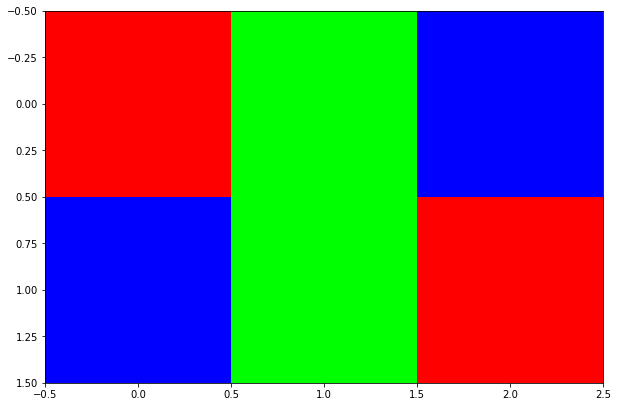

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow([[r,g,b,],[b,g,r]])

In [5]:
def makeASquare(color1, color2):
    """
    color1, color2: two rgb colors in format (255, 255, 255)
    outputs a grid of rgb colors corresponding to one square of the quilt
    """
    square = []
    stripes = [color1, color2]*12
    stripes.append(color1)
    for i in range(25):
        row = stripes[:i]
        if i % 2 == 0:
            row += ([color1,]*(25-i))
        else:
            row += ([color2,]*(25-i))
        square.append(row)
    return square      

In [6]:
makeASquare('a', 'b')

[['a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a'],
 ['a',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b'],
 ['a',
  'b',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a'],
 ['a',
  'b',
  'a',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b'],
 ['a',
  'b',
  'a',
  'b',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a',
  'a'],
 ['a',
  'b',
  'a',
  'b',
  'a',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
 

In [7]:
m1 = np.array([[1,2,3],[4,5,6],[7,8,9]])
m2 = np.concatenate((m1, m1), axis=1)
m2

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6],
       [7, 8, 9, 7, 8, 9]])

In [8]:
def makeARow(rowcolor, cols):
    """
    inputs:
        rowcolor = an rgb color in format (255, 0, 0)
        cols: an array with rgb value entries
    returns a matrix of color values representing a blanket row
    """
    for c2 in cols:
        square = np.array(makeASquare(rowcolor, c2))
        try:
            bigrow = np.concatenate((bigrow, square), axis=1)
        except UnboundLocalError:
            bigrow = square
    return bigrow

In [9]:
makeARow(1, [1,2,])

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 2, 2],
       [1, 1, 1, ..., 1, 2, 1]])

In [10]:
def makeABlanket(rows, cols):
    """
    inputs:
        rows, cols: an array with rgb value entries in format (255, 0, 0)
    returns a matrix of color values representing a blanket
    """
    for c1 in rows:
        bigrow = makeARow(c1, cols)
        try:
            blanket = np.concatenate((blanket, bigrow), axis=0)
        except UnboundLocalError:
            blanket = bigrow
    return blanket

In [11]:
makeABlanket([1, 2], [3, 4])

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 3, 3, ..., 4, 4, 4],
       [1, 3, 1, ..., 1, 1, 1],
       ...,
       [2, 3, 2, ..., 2, 2, 2],
       [2, 3, 2, ..., 2, 4, 4],
       [2, 3, 2, ..., 2, 4, 2]])

In [12]:
blanket = makeABlanket([1, 2], [3, 4])
blanket.shape

(50, 50)

In [13]:
def visualizeBlanket(rows, cols, save=False):
    """
    inputs:
        rows, cols: an array with rgb value entries in format (255, 0, 0)
        save: (optional) path to save image to
    output:
        shows what the blanket will look like
    """
    blanket = makeABlanket(rows, cols)
    x, y = blanket.shape[:2]
    fig, ax = plt.subplots(figsize=(x/10, y/10))
    ax.imshow(blanket)
    ax.xaxis.set_major_locator(ticker.NullLocator())
    ax.yaxis.set_major_locator(ticker.NullLocator())
    if save:
        plt.savefig(save, bbox_inches='tight', dpi=100)

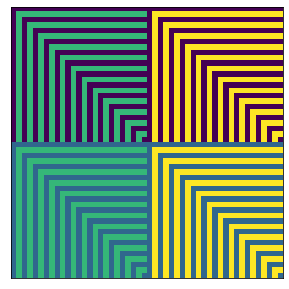

In [14]:
visualizeBlanket([1, 2], [3, 4])

In [15]:
black = (0, 0, 0)

#purples
grape = (150, 119, 220)
orchid = (172, 160, 196)
iris = (81, 46, 136)
lavBlue = (141, 154, 199)
berryBlue = (135, 115, 212)
purple = (59, 37, 78)
blackberry = (184, 128, 164)

#warms
sdYellow = (219, 206, 76)
melon = (205, 152, 86)
persimmon = (223, 113, 98)
gold = (219, 179, 54)
woodland = (226, 189, 134)

#blues
cobalt = (51, 131, 197)
royalBlue = (14, 99, 166)

#teals
coolGreen = (6, 120, 119)
blueMint = (61, 160, 189)
pagoda = (21, 65, 85)
ocean = (16, 106, 136)

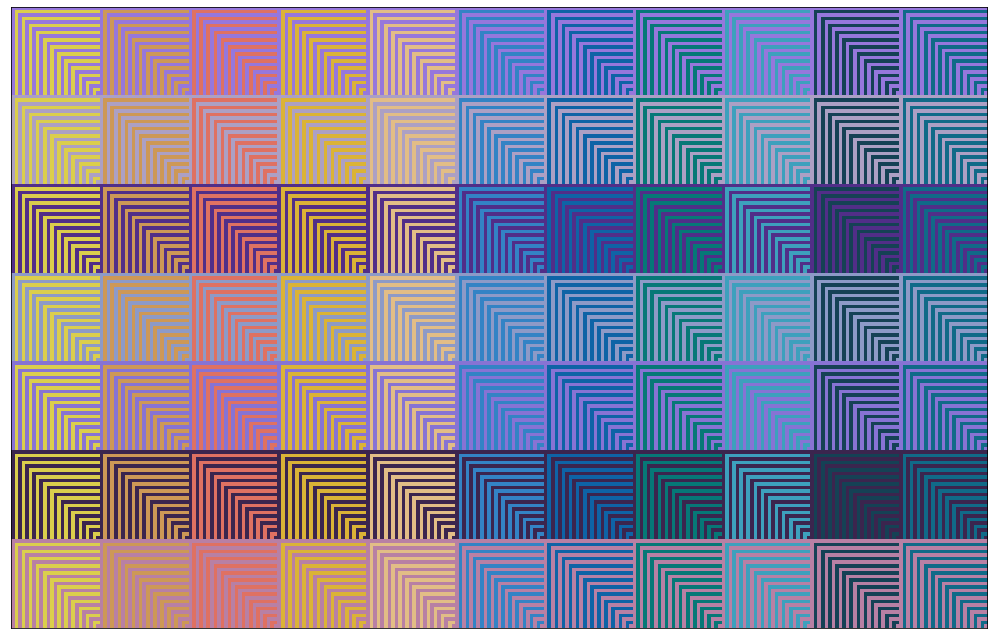

In [16]:
rows = [grape, orchid, iris, lavBlue, berryBlue, purple, blackberry]
cols = [sdYellow, melon, persimmon, gold, woodland, cobalt, royalBlue, coolGreen, blueMint, pagoda, ocean]
visualizeBlanket(rows, cols)

In [17]:
rows = [purple, iris, grape, orchid, blackberry, persimmon, melon, sdYellow, blueMint, ocean, pagoda]
cols = [purple, iris, grape, orchid, blackberry, persimmon, melon, sdYellow, blueMint, ocean, pagoda]
visualizeBlanket(rows, cols)
#visualizeBlanket(rows, cols, save="C:/Users/kifis/Documents/crafts/hue_shift_ex1.png")

In [18]:
rows = [purple, iris, grape, blackberry, melon, sdYellow, orchid, blueMint, ocean, iris, purple]
cols = [purple, iris, grape, blackberry, melon, sdYellow, orchid, blueMint, ocean, iris, purple]
visualizeBlanket(rows, cols, save="C:/Users/kifis/Documents/crafts/hue_shift_ex2.png")

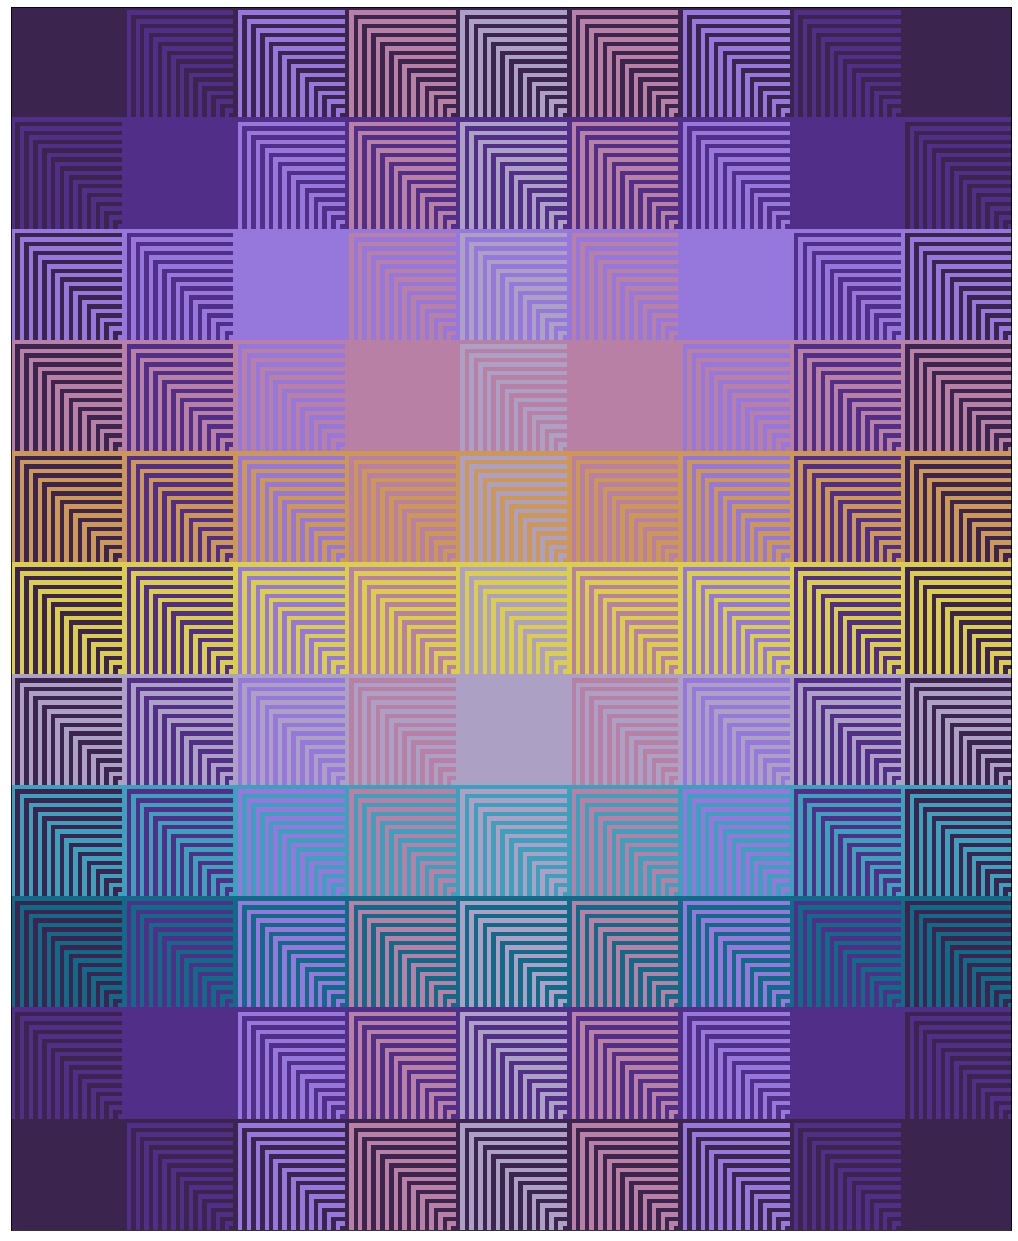

In [19]:
rows = [purple, iris, grape, blackberry, melon, sdYellow, orchid, blueMint, ocean, iris, purple]
cols = [purple, iris, grape, blackberry, orchid, blackberry, grape, iris, purple]
visualizeBlanket(rows, cols)
#visualizeBlanket(rows, cols, save="C:/Users/kifis/Documents/crafts/hue_shift_ex2.png")

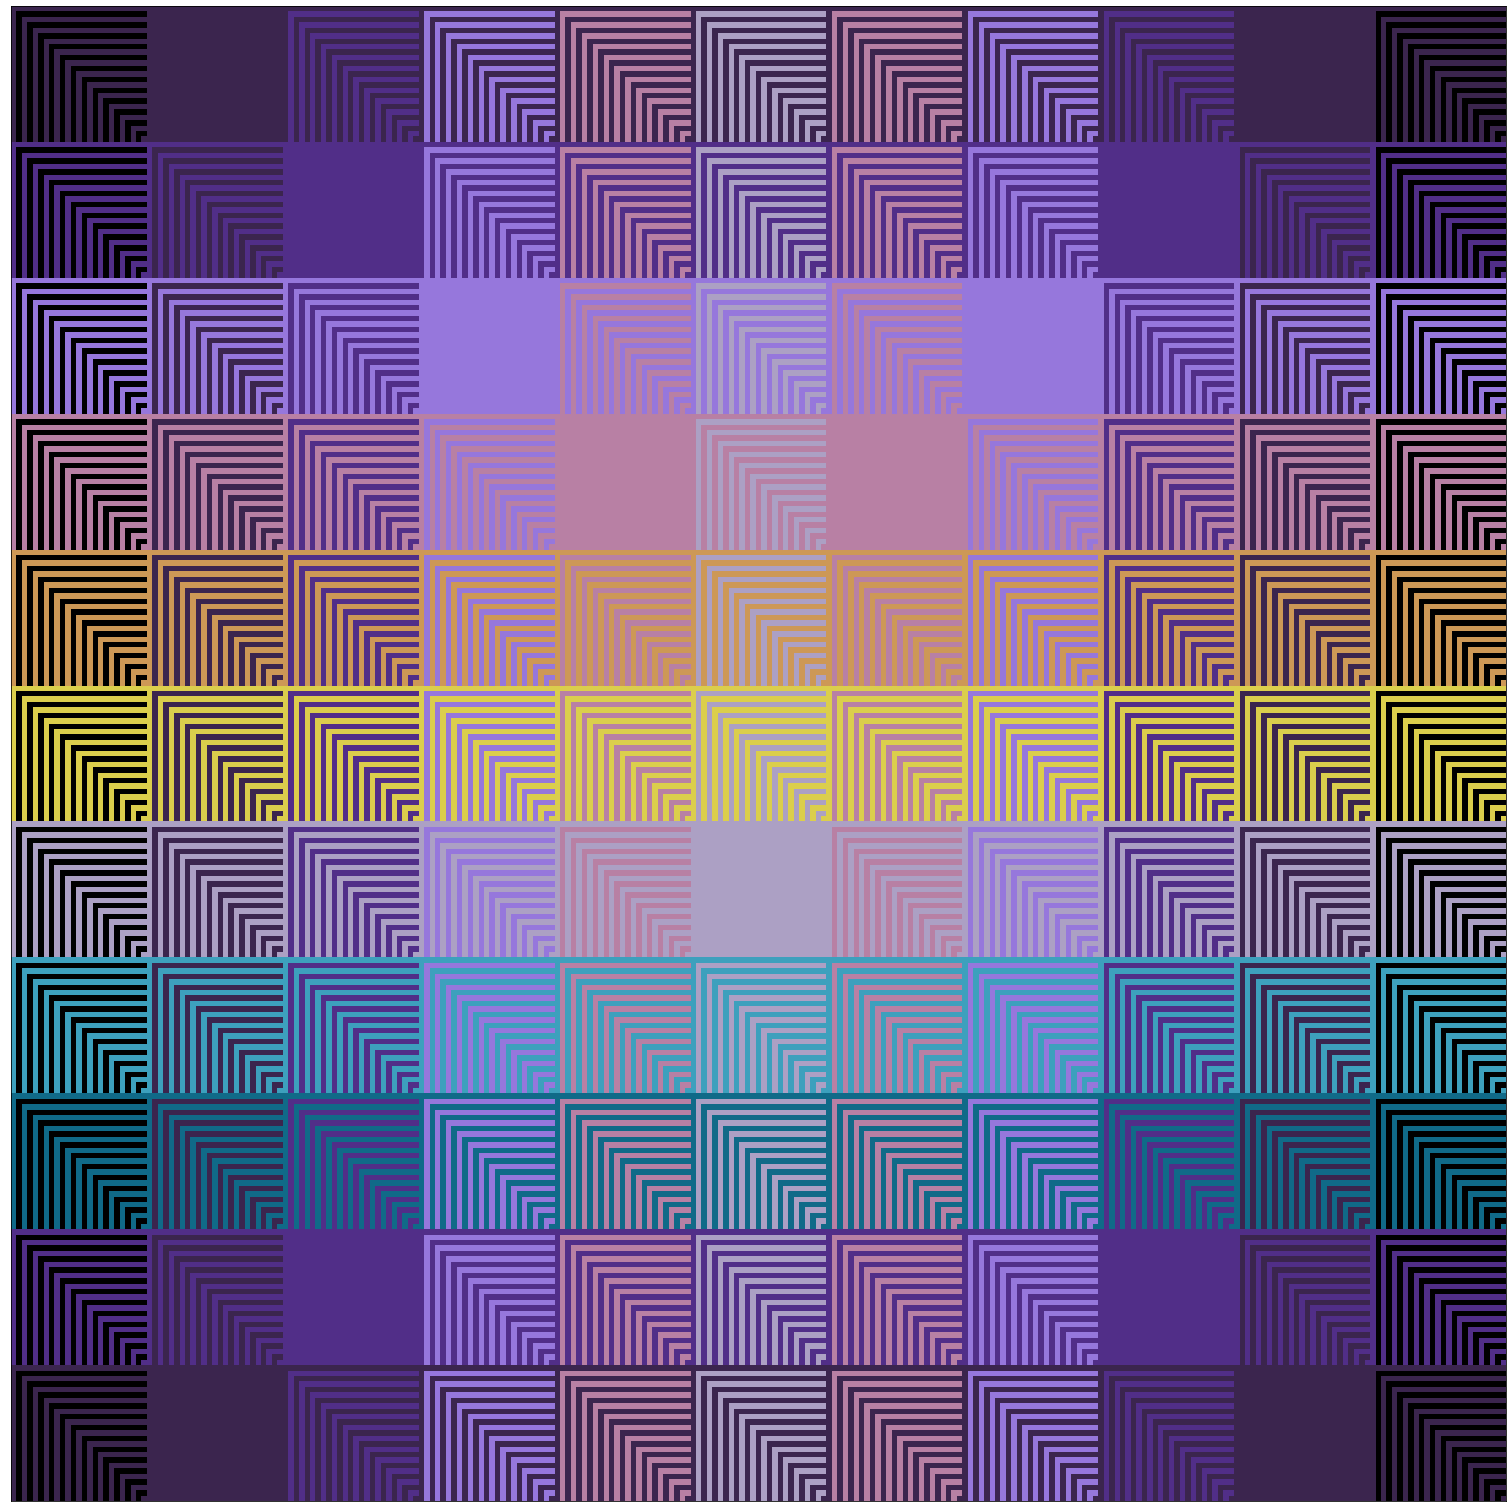

In [20]:
rows = [purple, iris, grape, blackberry, melon, sdYellow, orchid, blueMint, ocean, iris, purple]
cols = [black, purple, iris, grape, blackberry, orchid, blackberry, grape, iris, purple, black]
visualizeBlanket(rows, cols)
#visualizeBlanket(rows, cols, save="C:/Users/kifis/Documents/crafts/hue_shift_ex3.png")

In [22]:
rows = [black, purple, iris, grape, blackberry, melon, sdYellow, orchid, blueMint, ocean, pagoda, black]
cols = rows[::1]
visualizeBlanket(rows, cols, save="C:/Users/kifis/Documents/crafts/hue_shift_ex4.png")

In [40]:
rows = [black, purple, iris, grape, orchid, blackberry, persimmon, melon, sdYellow, blueMint, ocean, pagoda, black]
cols = rows[::1]
visualizeBlanket(rows, cols)
#visualizeBlanket(rows, cols, save="C:/Users/kifis/Documents/crafts/hue_shift_ex5.png")

In [41]:
rows = [black, purple, iris, grape, orchid, blackberry, persimmon, sdYellow, blueMint, ocean, pagoda, black]
cols = rows[::1]
visualizeBlanket(rows, cols)
#visualizeBlanket(rows, cols, save="C:/Users/kifis/Documents/crafts/hue_shift_ex6.png")

In [42]:
rows = [black, purple, iris, grape, orchid, blackberry, persimmon, sdYellow]
cols = [black, purple, iris, grape, orchid, blackberry, ocean, blueMint]
cols = cols[::1]
visualizeBlanket(rows, cols)
#visualizeBlanket(rows, cols, save="C:/Users/kifis/Documents/crafts/hue_shift_ex7.png")

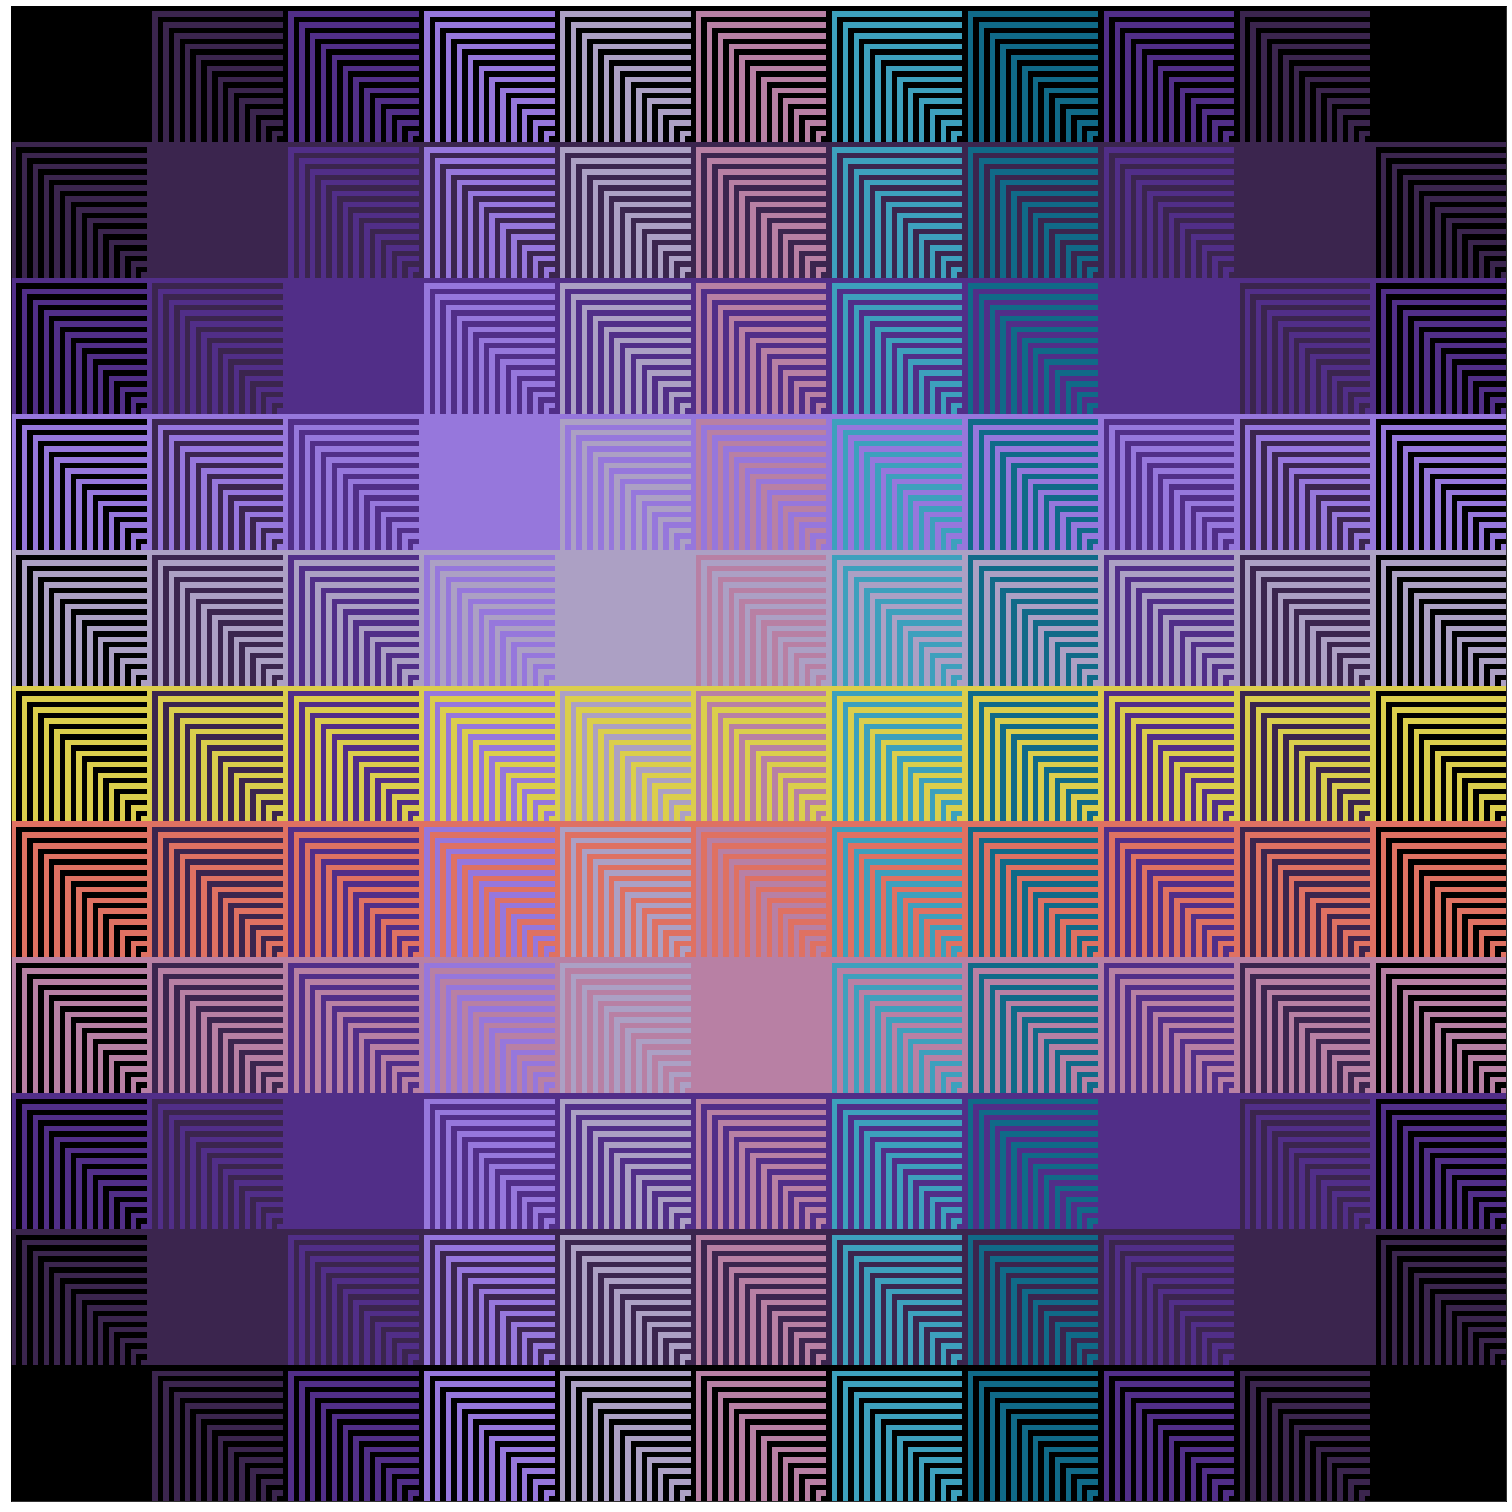

In [43]:
rows = [black, purple, iris, grape, orchid, sdYellow, persimmon, blackberry, iris, purple, black]
cols = [black, purple, iris, grape, orchid, blackberry, blueMint, ocean, iris, purple, black]
cols = cols[::1]
visualizeBlanket(rows, cols)
#visualizeBlanket(rows, cols, save="C:/Users/kifis/Documents/crafts/hue_shift_ex8.png")